In [1]:
import argparse
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import uproot 
import awkward as ak
from pathlib import Path

from typing import Dict, List 
import re
import pickle
from tqdm import tqdm

# Preapare sample 
this is based one the old sample - no forward/central label 

In [2]:
sample_alljets_path = '../../samples/BDT_training/sample_all.pkl'
sample_alljets_path = Path(sample_alljets_path)
with open(sample_alljets_path, 'rb') as f:
    sample_alljets = pickle.load(f)

In [3]:
columns = [*sample_alljets.columns]
partonID_idx = columns.index('jet_PartonTruthLabelID')

## Flat Pt 
### Physical weights

[]

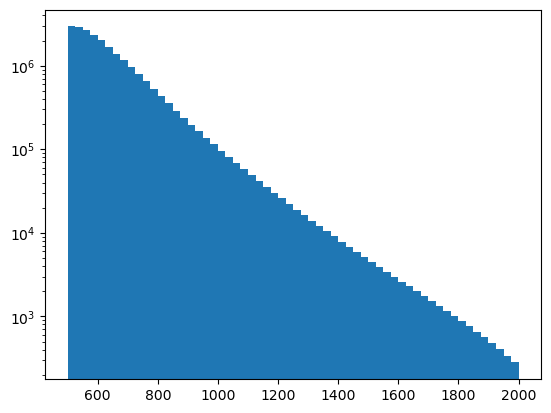

In [4]:
fig, ax = plt.subplots()
pt_edges = np.linspace(500, 2000, 61)
bin_contents, bin_edges, _ = ax.hist(sample_alljets['jet_pt'], bins=pt_edges, weights=sample_alljets['total_weight'])
ax.set_yscale('log')
plt.plot()


### Flatten pt

In [5]:
flat_weight_factor = 1./bin_contents
pt_binned_sample_alljets_idx = np.digitize(sample_alljets['jet_pt'], pt_edges)

In [6]:
sample_alljets['flatpt_weight'] = sample_alljets['total_weight'].copy()

for i in range(np.max(pt_binned_sample_alljets_idx)):
    mod_idx = np.where(pt_binned_sample_alljets_idx-1 == i)[0]
    sample_alljets.loc[mod_idx, "flatpt_weight"] *= flat_weight_factor[i]

### Validate flat pt

[]

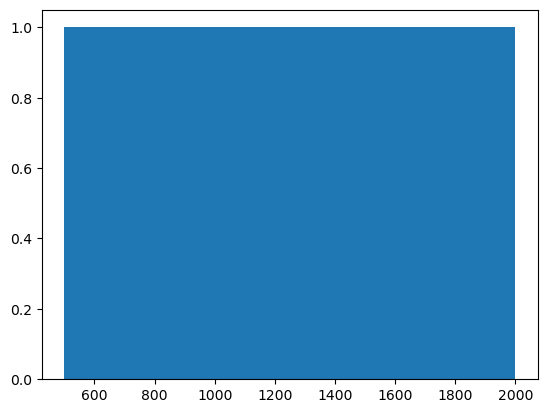

In [7]:
fig, ax = plt.subplots()
pt_edges = np.linspace(500, 2000, 61)
bin_contents, bin_edges, _ = ax.hist(sample_alljets['jet_pt'], bins=pt_edges, weights=sample_alljets['flatpt_weight'])
plt.plot()

In [8]:
col_list = list(sample_alljets)
col_list[-1], col_list[-2]  = col_list[-2], col_list[-1]  

In [9]:
sample_alljets = sample_alljets.reindex(columns = col_list)

## Save subset jets

In [10]:
n_jets = 10_000_000

In [11]:
quark_idx = np.where((sample_alljets['jet_PartonTruthLabelID'] == 1) | 
                     (sample_alljets['jet_PartonTruthLabelID'] == 2) | 
                     (sample_alljets['jet_PartonTruthLabelID'] == 3) | 
                     (sample_alljets['jet_PartonTruthLabelID'] == 4) | 
                     (sample_alljets['jet_PartonTruthLabelID'] == 5) )[0]

gluon_idx = np.where((sample_alljets['jet_PartonTruthLabelID'] == 21))[0]

sample_alljets.loc[quark_idx, "target"] = 0 
sample_alljets.loc[gluon_idx, "target"] = 1 

np.random.seed(42)
quark_chose_idx = np.random.choice(quark_idx, n_jets)
gluon_chose_idx = np.random.choice(gluon_idx, n_jets)

In [12]:
sample_alljets_path = '../../samples/BDT_training/sample_all_w_flatpt.pkl'
with open(sample_alljets_path, 'wb') as f:
    sample_alljets.to_pickle(f)

In [18]:
sample_20Mjets = pd.concat((sample_alljets.loc[quark_chose_idx], sample_alljets.loc[gluon_chose_idx]))

In [19]:
sample_alljets_path = '../../samples/BDT_training/sample_20M_w_flatpt.pkl'
with open(sample_alljets_path, 'wb') as f:
    sample_20Mjets.to_pickle(f)

In [15]:
sample_20Mjets.head()

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,total_weight,flatpt_weight,target
31579238,1547.838623,-0.930269,15.0,0.011356,0.052429,-0.334541,2.0,0.002223,5.670091e-07,0.0
23200604,993.663452,-1.478766,2.0,0.016853,0.019205,-0.447058,1.0,0.239311,2.097025e-06,0.0
16094478,628.064880,0.125171,8.0,0.009018,0.093058,-0.525091,2.0,0.289050,1.717077e-07,0.0
23327850,773.069885,-0.231992,9.0,0.037134,0.158680,-0.295251,2.0,0.235179,3.610266e-07,0.0
26858567,1297.237915,-1.310552,22.0,0.030811,0.195837,0.030363,2.0,0.032431,1.991512e-06,0.0


In [20]:
sample_20Mjets.tail()

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,total_weight,flatpt_weight,target
52562768,1006.660095,0.580398,13.0,0.016290,0.168840,-0.263419,21.0,0.249466,2.608756e-06,1.0
45155425,698.423645,0.632916,22.0,0.060126,0.256313,0.047444,21.0,0.382262,3.295849e-07,1.0
34610484,669.356689,-0.466975,24.0,0.065847,0.268361,0.184779,21.0,0.431040,3.085300e-07,1.0
55730962,1737.624512,-0.248504,51.0,0.073300,0.270896,0.336857,21.0,0.001165,8.711939e-07,1.0
46863634,562.131775,0.436445,30.0,0.104463,0.260482,0.222122,21.0,0.606060,2.275886e-07,1.0


## Save 1M jets

In [21]:
n_jets = 1_000_000

quark_idx = np.where((sample_alljets['jet_PartonTruthLabelID'] == 1) | 
                     (sample_alljets['jet_PartonTruthLabelID'] == 2) | 
                     (sample_alljets['jet_PartonTruthLabelID'] == 3) | 
                     (sample_alljets['jet_PartonTruthLabelID'] == 4) | 
                     (sample_alljets['jet_PartonTruthLabelID'] == 5) )[0]

gluon_idx = np.where((sample_alljets['jet_PartonTruthLabelID'] == 21))[0]

np.random.seed(587)
quark_chose_idx = np.random.choice(quark_idx, n_jets)
gluon_chose_idx = np.random.choice(gluon_idx, n_jets)


sample_2Mjets = pd.concat((sample_alljets.loc[quark_chose_idx], sample_alljets.loc[gluon_chose_idx]))

sample_alljets_path = '../../samples/BDT_training/sample_2M_w_flatpt.pkl'
with open(sample_alljets_path, 'wb') as f:
    sample_2Mjets.to_pickle(f)


In [23]:
sample_2Mjets.columns

Index(['jet_pt', 'jet_eta', 'jet_nTracks', 'jet_trackWidth', 'jet_trackC1',
       'jet_trackBDT', 'jet_PartonTruthLabelID', 'total_weight',
       'flatpt_weight', 'target'],
      dtype='object')

[]

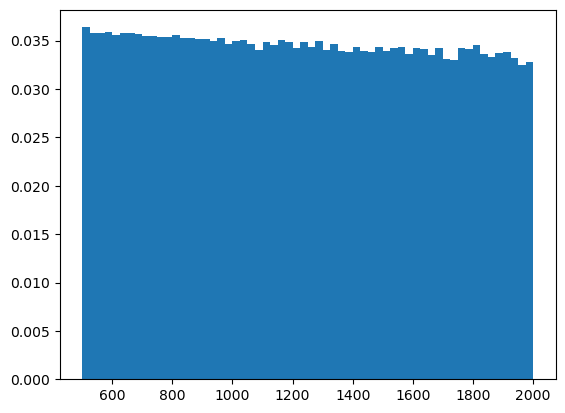

In [24]:
fig, ax = plt.subplots()
pt_edges = np.linspace(500, 2000, 61)
bin_contents, bin_edges, _ = ax.hist(sample_2Mjets['jet_pt'], bins=pt_edges, weights=sample_2Mjets['flatpt_weight'])
plt.plot()

In [26]:
label_ptrange = np.array([500, 600, 800, 1000, 1200, 1500, 2000])
binned_idx = np.digitize(sample_2Mjets, label_ptrange)
for i, l_ptrange in enumerate(label_ptrange[:-1]):
    n_jets_pt = np.where(binned_idx-1 == i)[0]
    print(f"{l_ptrange} - {label_ptrange[i+1]} GeV: {len(n_jets_pt)} jets")

# Inspect samples

## Jet in pt fraction

In [78]:
def check_stat(inspect_sample):
    stats = []
    stats_parton = [[], []]
    label_ptrange = np.array([500, 600, 800, 1000, 1200, 1500, 2000])
    binned_idx = np.digitize(inspect_sample, label_ptrange)
    for i, l_ptrange in enumerate(label_ptrange[:-1]):
        n_jets_pt = np.where(binned_idx-1 == i)[0]
        sample_jet_pt = inspect_sample.iloc[n_jets_pt]
        stats.append(len(n_jets_pt))
        
        n_quarks_pt = np.sum(sample_jet_pt['target'] == 0) 
        n_gluons_pt = np.sum(sample_jet_pt['target'] == 1) 

        stats_parton[0].append(n_quarks_pt)
        stats_parton[1].append(n_gluons_pt)

    stats = np.array(stats)
    stats_parton = np.array(stats_parton)

    n_total_jets = np.sum(stats)
    all_stats = np.concatenate((stats[None,:], stats_parton), axis = 0)

    index = ['all_jets', 'quark', 'gluon']
    stats_pd = pd.DataFrame(all_stats, index = index, columns = [l_pt for l_pt in label_ptrange[:-1]])
    stats_pd_frac = stats_pd / n_total_jets
    
    return stats_pd, stats_pd_frac

In [79]:
check_stat(sample_alljets)

(              500       600      800      1000     1200     1500
 all_jets  14162100  21408104  6910069  3858388  4877825  5196092
 quark      6839446  11674189  4081152  2381426  3225696  3786384
 gluon      7322654   9733915  2828917  1476962  1652129  1409708,
               500       600       800       1000      1200      1500
 all_jets  0.251045  0.379492  0.122492  0.068396  0.086467  0.092109
 quark     0.121240  0.206943  0.072345  0.042214  0.057180  0.067119
 gluon     0.129805  0.172549  0.050147  0.026181  0.029287  0.024989)

In [80]:
check_stat(sample_2Mjets)

(            500     600     800     1000    1200    1500
 all_jets  512046  763968  243777  135046  168576  176587
 quark     213170  365307  127676   74568  100726  118553
 gluon     298876  398661  116101   60478   67850   58034,
               500       600       800       1000      1200      1500
 all_jets  0.256023  0.381984  0.121888  0.067523  0.084288  0.088293
 quark     0.106585  0.182653  0.063838  0.037284  0.050363  0.059277
 gluon     0.149438  0.199330  0.058050  0.030239  0.033925  0.029017)

In [81]:
check_stat(sample_20Mjets)

(             500      600      800      1000     1200     1500
 all_jets  5135919  7636245  2436206  1347005  1684522  1760103
 quark     2138243  3651480  1275920   743861  1007733  1182763
 gluon     2997676  3984765  1160286   603144   676789   577340,
               500       600       800       1000      1200      1500
 all_jets  0.256796  0.381812  0.121810  0.067350  0.084226  0.088005
 quark     0.106912  0.182574  0.063796  0.037193  0.050387  0.059138
 gluon     0.149884  0.199238  0.058014  0.030157  0.033839  0.028867)

## Make Equal jet size in pt bins 

In [83]:
quark_jet = []
gluon_jet = []
n_equal_sample = 100_000
inspect_sample = sample_alljets
label_ptrange = np.array([500, 600, 800, 1000, 1200, 1500, 2000])
binned_idx = np.digitize(inspect_sample, label_ptrange)
for i, l_ptrange in enumerate(label_ptrange[:-1]):
    n_jets_pt = np.where(binned_idx-1 == i)[0]
    sample_jet_pt = inspect_sample.iloc[n_jets_pt]
    
    quark_jet_pt = sample_jet_pt[sample_jet_pt['target'] == 0]
    gluon_jet_pt = sample_jet_pt[sample_jet_pt['target'] == 1]

    quark_jet.append(quark_jet_pt.sample(n=n_equal_sample, random_state=123))
    gluon_jet.append(gluon_jet_pt.sample(n=n_equal_sample, random_state=456))

quark_jet = pd.concat(quark_jet)
gluon_jet = pd.concat(gluon_jet)

equal_sample_1p2M = pd.concat([quark_jet, gluon_jet])


In [92]:
equal_sample_1p2M

,jet_pt,jet_eta,jet_nTracks,jet_trackWidth,jet_trackC1,jet_trackBDT,jet_PartonTruthLabelID,total_weight,flatpt_weight,target
15486605,551.991333,-0.266405,8.0,0.010646,0.047136,-0.491465,3.0,1.039891,3.905014e-07,0.0
15839693,576.142761,0.636299,7.0,0.015033,0.106389,-0.490150,3.0,0.556316,2.373530e-07,0.0
21103628,586.163513,-0.585899,10.0,0.027492,0.129582,-0.300657,2.0,0.832061,3.550004e-07,0.0
2788738,556.438843,1.764535,9.0,0.021857,0.116333,-0.393937,2.0,0.738872,2.774620e-07,0.0
14749764,552.082520,0.461343,10.0,0.027210,0.165578,-0.255351,2.0,0.558921,2.098866e-07,0.0
...,...,...,...,...,...,...,...,...,...,...
55462926,1904.423706,-0.350538,25.0,0.019203,0.190646,0.113524,21.0,0.001901,3.970204e-06,1.0
55895227,1699.826660,-0.489630,56.0,0.104905,0.259539,0.315869,21.0,0.001910,1.093574e-06,1.0
55187794,1542.028198,-0.194443,25.0,0.006375,0.039141,0.022390,21.0,0.016940,4.320953e-06,1.0
55536096,1811.730103,-1.048542,38.0,0.052871,0.244488,0.226203,21.0,0.002296,2.609441e-06,1.0


[]

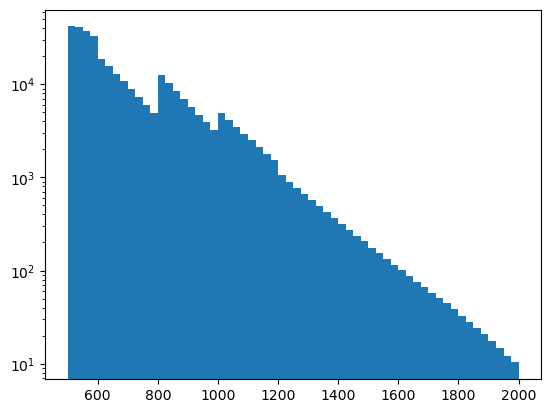

In [95]:
fig, ax = plt.subplots()
pt_edges = np.linspace(500, 2000, 61)
bin_contents, bin_edges, _ = ax.hist(equal_sample_1p2M['jet_pt'], bins=pt_edges, weights=equal_sample_1p2M['total_weight'])
ax.set_yscale('log')
plt.plot()

[]

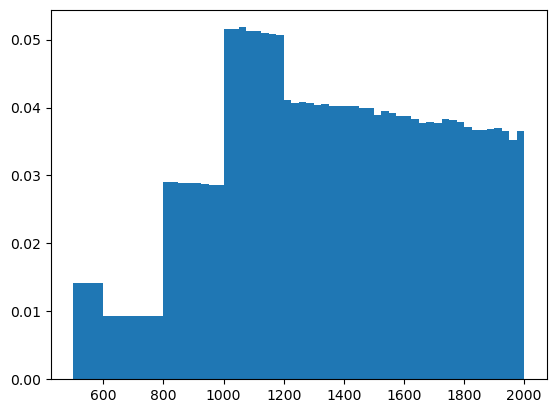

In [93]:
fig, ax = plt.subplots()
pt_edges = np.linspace(500, 2000, 61)
bin_contents, bin_edges, _ = ax.hist(equal_sample_1p2M['jet_pt'], bins=pt_edges, weights=equal_sample_1p2M['flatpt_weight'])
plt.plot()

In [96]:
sample_alljets_path = '../../samples/BDT_training/sample_equal_1p2M_w_flatpt.pkl'
with open(sample_alljets_path, 'wb') as f:
    equal_sample_1p2M.to_pickle(f)

## Make 1M Equal jet size in pt bins 

In [97]:
quark_jet = []
gluon_jet = []
n_equal_sample = 1_000_000
inspect_sample = sample_alljets
label_ptrange = np.array([500, 600, 800, 1000, 1200, 1500, 2000])
binned_idx = np.digitize(inspect_sample, label_ptrange)
for i, l_ptrange in enumerate(label_ptrange[:-1]):
    n_jets_pt = np.where(binned_idx-1 == i)[0]
    sample_jet_pt = inspect_sample.iloc[n_jets_pt]
    
    quark_jet_pt = sample_jet_pt[sample_jet_pt['target'] == 0]
    gluon_jet_pt = sample_jet_pt[sample_jet_pt['target'] == 1]

    quark_jet.append(quark_jet_pt.sample(n=n_equal_sample, random_state=123))
    gluon_jet.append(gluon_jet_pt.sample(n=n_equal_sample, random_state=456))

quark_jet = pd.concat(quark_jet)
gluon_jet = pd.concat(gluon_jet)

equal_sample_12M = pd.concat([quark_jet, gluon_jet])


In [98]:
sample_alljets_path = '../../samples/BDT_training/sample_equal_12M_w_flatpt.pkl'
with open(sample_alljets_path, 'wb') as f:
    equal_sample_12M.to_pickle(f)